<a href="https://colab.research.google.com/github/at9725/random-code/blob/main/%22SPY%22%2C%22BND%22%2C%22GLD%22%2C%22QQQ%22%2C%22VTI%22_conf_interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot  as plt
from scipy.stats import norm

In [ ]:
years = 15

endDate =dt.datetime.now()
startDate = endDate -dt.timedelta(days=365*years)

In [ ]:
tickers = ["SPY","BND","GLD","QQQ","VTI"]

In [ ]:
adj_close_df = pd.DataFrame()

for ticker in tickers:
  data = yf.download(ticker, start = startDate, end = endDate)
  adj_close_df[ticker] = data['Adj Close']

  print(adj_close_df)

[*********************100%***********************]  1 of 1 completed


                   SPY
Date                  
2010-01-11   87.089180
2010-01-12   86.276955
2010-01-13   87.005684
2010-01-14   87.240997
2010-01-15   86.261780
...                ...
2024-12-27  595.010010
2024-12-30  588.219971
2024-12-31  586.080017
2025-01-02  584.640015
2025-01-03  591.950012

[3771 rows x 1 columns]


[*********************100%***********************]  1 of 1 completed


                   SPY        BND
Date                             
2010-01-11   87.089180  51.566036
2010-01-12   86.276955  51.762016
2010-01-13   87.005684  51.644421
2010-01-14   87.240997  51.768539
2010-01-15   86.261780  51.801212
...                ...        ...
2024-12-27  595.010010  71.750000
2024-12-30  588.219971  72.029999
2024-12-31  586.080017  71.910004
2025-01-02  584.640015  71.940002
2025-01-03  591.950012  71.849998

[3771 rows x 2 columns]


[*********************100%***********************]  1 of 1 completed


                   SPY        BND         GLD
Date                                         
2010-01-11   87.089180  51.566036  112.849998
2010-01-12   86.276955  51.762016  110.489998
2010-01-13   87.005684  51.644421  111.540001
2010-01-14   87.240997  51.768539  112.029999
2010-01-15   86.261780  51.801212  110.860001
...                ...        ...         ...
2024-12-27  595.010010  71.750000  241.399994
2024-12-30  588.219971  72.029999  240.630005
2024-12-31  586.080017  71.910004  242.130005
2025-01-02  584.640015  71.940002  245.419998
2025-01-03  591.950012  71.849998  243.490005

[3771 rows x 3 columns]


[*********************100%***********************]  1 of 1 completed


                   SPY        BND         GLD         QQQ
Date                                                     
2010-01-11   87.089180  51.566036  112.849998   40.493790
2010-01-12   86.276955  51.762016  110.489998   39.987186
2010-01-13   87.005684  51.644421  111.540001   40.485031
2010-01-14   87.240997  51.768539  112.029999   40.519989
2010-01-15   86.261780  51.801212  110.860001   40.048313
...                ...        ...         ...         ...
2024-12-27  595.010010  71.750000  241.399994  522.559998
2024-12-30  588.219971  72.029999  240.630005  515.609985
2024-12-31  586.080017  71.910004  242.130005  511.230011
2025-01-02  584.640015  71.940002  245.419998  510.230011
2025-01-03  591.950012  71.849998  243.490005  518.580017

[3771 rows x 4 columns]


[*********************100%***********************]  1 of 1 completed

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2010-01-11   87.089180  51.566036  112.849998   40.493790   44.365936
2010-01-12   86.276955  51.762016  110.489998   39.987186   43.907940
2010-01-13   87.005684  51.644421  111.540001   40.485031   44.320137
2010-01-14   87.240997  51.768539  112.029999   40.519989   44.396481
2010-01-15   86.261780  51.801212  110.860001   40.048313   43.892666
...                ...        ...         ...         ...         ...
2024-12-27  595.010010  71.750000  241.399994  522.559998  294.070007
2024-12-30  588.219971  72.029999  240.630005  515.609985  290.820007
2024-12-31  586.080017  71.910004  242.130005  511.230011  289.809998
2025-01-02  584.640015  71.940002  245.419998  510.230011  289.260010
2025-01-03  591.950012  71.849998  243.490005  518.580017  293.059998

[3771 rows x 5 columns]


In [ ]:
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns = log_returns.dropna()

print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2010-01-12 -0.009370  0.003793 -0.021134 -0.012590 -0.010377
2010-01-13  0.008411 -0.002274  0.009458  0.012373  0.009344
2010-01-14  0.002701  0.002400  0.004383  0.000863  0.001721
2010-01-15 -0.011288  0.000631 -0.010499 -0.011709 -0.011413
2010-01-19  0.012418 -0.000505  0.005936  0.016011  0.013131
...              ...       ...       ...       ...       ...
2024-12-27 -0.010582 -0.002088 -0.006894 -0.013382 -0.010890
2024-12-30 -0.011477  0.003895 -0.003195 -0.013389 -0.011113
2024-12-31 -0.003645 -0.001667  0.006214 -0.008531 -0.003479
2025-01-02 -0.002460  0.000417  0.013496 -0.001958 -0.001900
2025-01-03  0.012426 -0.001252 -0.007895  0.016233  0.013051

[3770 rows x 5 columns]


In [ ]:
def expected_return(weights, log_returns):
  return np.sum(log_returns.mean()*weights)

In [ ]:
def standard_deviation(weights,cov_matrix):
  variance = weights.T @ cov_matrix @ weights
  return np.sqrt(variance)


In [ ]:
cov_matrix = log_returns.cov()
print(cov_matrix)

              SPY           BND       GLD           QQQ           VTI
SPY  1.161710e-04  1.162375e-07  0.000006  1.292191e-04  1.186151e-04
BND  1.162375e-07  9.346687e-06  0.000009  9.917402e-07  3.142707e-07
GLD  5.776850e-06  9.018624e-06  0.000096  7.058761e-06  6.334463e-06
QQQ  1.292191e-04  9.917402e-07  0.000007  1.666444e-04  1.319818e-04
VTI  1.186151e-04  3.142707e-07  0.000006  1.319818e-04  1.220872e-04


In [ ]:
portfolio_value = 1000000

weights = np.array([1/len(tickers)]*len(tickers))

portfolio_expected_return = expected_return(weights,log_returns)

portfolio_std_dev = standard_deviation(weights,cov_matrix)

print(portfolio_expected_return)
print(portfolio_std_dev)


0.0003954946630886245
0.007290644408378793


In [ ]:
def random_z_score():
  return np.random.normal(0,1)

In [ ]:
days = 5

def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score,days):
  return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

In [ ]:
simulations = 10000

scenarioReturn= []

for i in range(simulations):
  z_score = random_z_score()
  scenarioReturn.append(scenario_gain_loss(portfolio_value,portfolio_std_dev,z_score,days))

In [ ]:
confidence_interval = 0.95

VaR = -np.percentile(scenarioReturn, 100*(1-confidence_interval))

print(VaR)

24829.0201361743


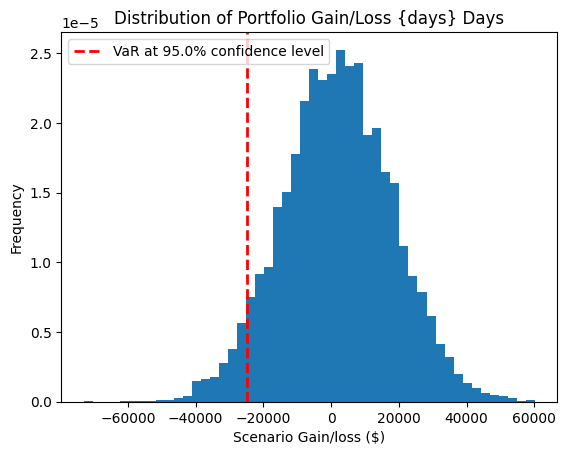

In [ ]:
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/loss ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Portfolio Gain/Loss {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval*100}% confidence level')
plt.legend()
plt.show()
